# Webscraping Project: Data Analysis and Visualization

I will begin by importing the needed libraries along with the cleaned data set into this notebook file so that I can work with it furthermore. 

In [1]:
!pip install python-docx
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from docx import Document
import csv
import pandas as pd
data = pd.read_csv('data_cleaned.csv')

In [2]:
# print head of the data set (first few rows)
get_rows = data.head(4)

print(get_rows)

                                               title  \
0                              Obsolete etiquette...   
1                               Supplements and life   
2  Why can't I talk normally when I'm with people...   
3                     Being diagnosed early or later   

                                            selftext  \
0  Or why I'm confused and rude constantly. This ...   
1  Ok, we all know the dozens of studies indicati...   
2  Probably a common issue but talking to myself/...   
3  Does someone else have being diagnosed with au...   

                                                 url                author  \
0  https://www.reddit.com/r/autism/comments/143x4...           greyishcorn   
1  https://www.reddit.com/r/autism/comments/1418j...  Negative_Plankton_59   
2  https://www.reddit.com/r/autism/comments/141hj...                A_S_63   
3  https://www.reddit.com/r/autism/comments/143om...              KiraLoan   

      timestamp  num_comments  upvotes         

## Word Cloud Visualizations

In [3]:
# pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

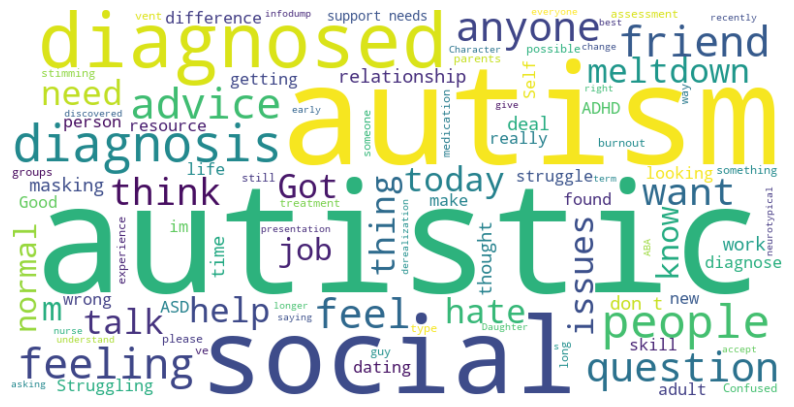

In [4]:
# 'title' column 
text = ' '.join(data['title'])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# save the above wordcloud as an image
wordcloud.to_file('wordcloud_title.png')

plt.show()

The above word cloud represents the frequency of words in the column 'text' by displaying them in a visual arrangement. It is seen that the most popular words seen in the titles are 'autism', 'social', 'autistic', 'diagnosis', and 'diagnosed'. This is interesting. 

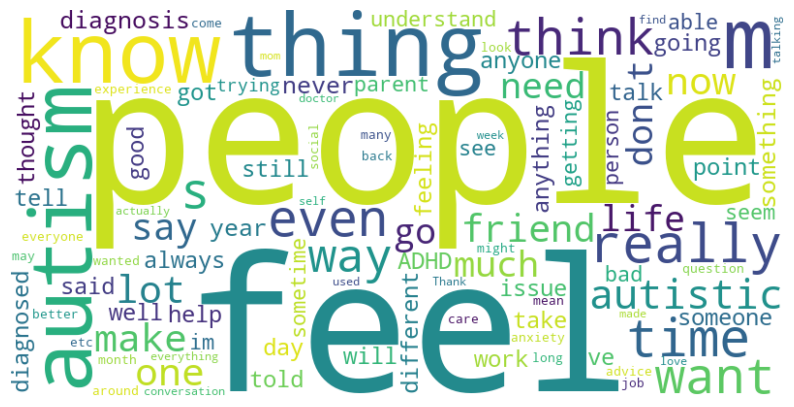

In [5]:
# now for the column 'selftext'
text = ' '.join(data['selftext'])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# save the above wordcloud as an image
wordcloud.to_file('wordcloud_selftext.png')

plt.show()

For the column 'selftext' we observe different results for the wordcloud. It seems that the most frequent words are 'people', 'know', 'autism', feel', and 'thing'. 

## Barchart Visualizations

The first barchart that I will be making will be showing the number of posts for each theme occuring my data set. Recall, that I have previously cleaned the data set and grouped them into themes based on the contents of the Reddit Post. 

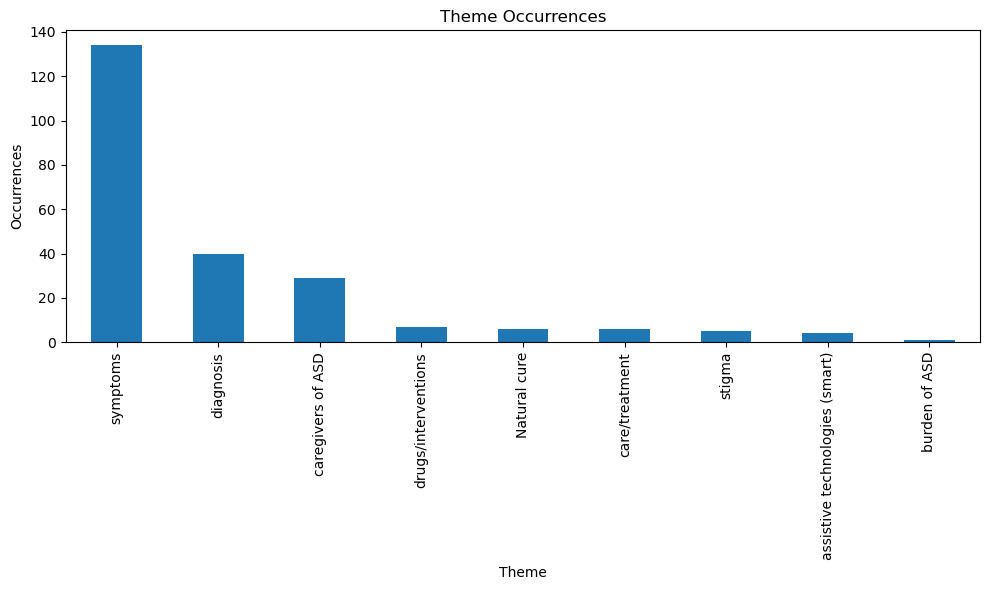

In [6]:
# Count the occurrences of each theme
theme_counts = data['theme'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar')
plt.xlabel('Theme')
plt.ylabel('Occurrences')
plt.title('Theme Occurrences')
plt.xticks(rotation=90) 
plt.tight_layout()  

# Save the bar chart as an image to the desktop
plt.savefig('barchart_theme_counts.png') 

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

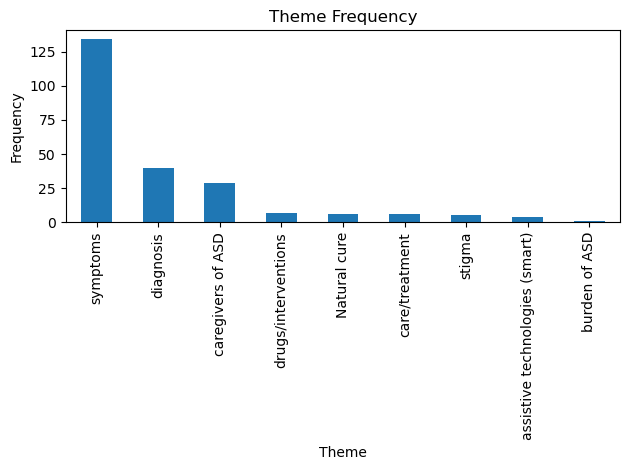

In [7]:
# Calculate the frequency of each theme
theme_counts = data['theme'].value_counts()

# Calculate the percentage of each theme
theme_percentages = (theme_counts / len(data)) * 100

# Create a DataFrame to display the theme frequency and percentage
theme_stats = pd.DataFrame({
    'Theme': theme_counts.index,
    'Frequency': theme_counts.values,
    'Percentage': theme_percentages.values
})

# Create a bar plot for theme frequency
plt.figure(figsize=(10, 6))
theme_stats.plot(kind='bar', x='Theme', y='Frequency', legend=False)
plt.xlabel('Theme')
plt.ylabel('Frequency')
plt.title('Theme Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the bar chart as an image to the desktop
plt.savefig('barchart_theme_frequency.png')

# Show the plot
plt.show()

# Create a Word document and add a table for theme stats
doc = Document()
doc.add_heading('Theme Statistics', 0)

# Create a table with headers
table = doc.add_table(rows=1, cols=3)
table.autofit = False

# Define table column widths in twentieths of a point
table.columns[0].width = 720  # Adjust this value as needed
table.columns[1].width = 1440  # Adjust this value as needed
table.columns[2].width = 1440  # Adjust this value as needed

# Add table headers
table.cell(0, 0).text = 'Theme'
table.cell(0, 1).text = 'Frequency'
table.cell(0, 2).text = 'Percentage'

# Add data to the table
for index, row in theme_stats.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(row['Theme'])
    cells[1].text = str(row['Frequency'])
    cells[2].text = str(round(row['Percentage'], 2)) + '%'

# Save the Word document
doc.save('themea_stats.docx')

It is seen that the theme with the most number of posts is 'symptoms'. The theme with the least number of posts represented in my data set is 'burden of ASD'. 

Now, I would like to look a the difference in number of comments and number of upvotes across the different themes in the data set. I will do so by creating another barchart. 

<Figure size 1000x600 with 0 Axes>

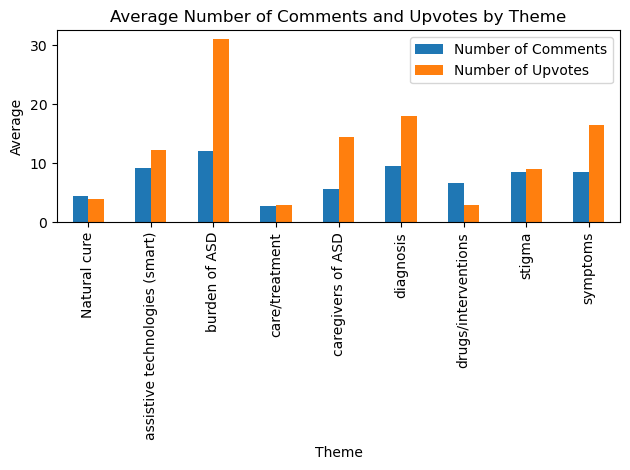

In [8]:
# Calculate the average num_comments and upvotes for each theme
theme_avg_data = data.groupby('theme')[['num_comments', 'upvotes']].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
theme_avg_data.plot(kind='bar')
plt.xlabel('Theme')
plt.ylabel('Average')
plt.title('Average Number of Comments and Upvotes by Theme')
plt.xticks(rotation=90)  
plt.legend(['Number of Comments', 'Number of Upvotes'])
plt.tight_layout()

# Save the bar chart as an image to the desktop
plt.savefig('barchart_theme_comments_upvotes_avgs.png')

# Show the plot
plt.show()

The theme with the most number of upvotes and comments is 'burden of ASD'. That is very interesting. Redditors must get a lot of support for talking about the burdens of ASD via social media. The theme with the least number of user interaaction was 'care/treatment'. 

## Histogram Visualizations
Now I will look at the distribution of the numerical columns represented in the data set: number of comments, number of upvotes, and timestamp. This will tell us about the posts that are in the data set. 

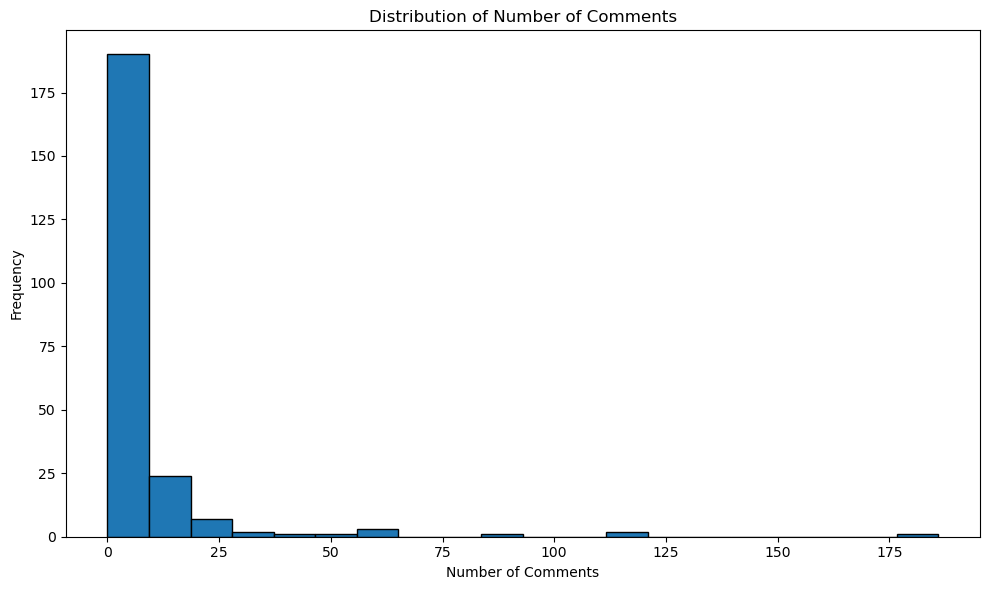

In [9]:
# distribution: number of comments

# Extract the "num_comments" column
num_comments = data['num_comments']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(num_comments, bins=20, edgecolor='black')  
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Comments')
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('histogram_num_comments.png')
# Show the histogram
plt.show()

Most of the posts have less than 20 comments. There is an outlier, however, with more thatn 175 comments on the post. 

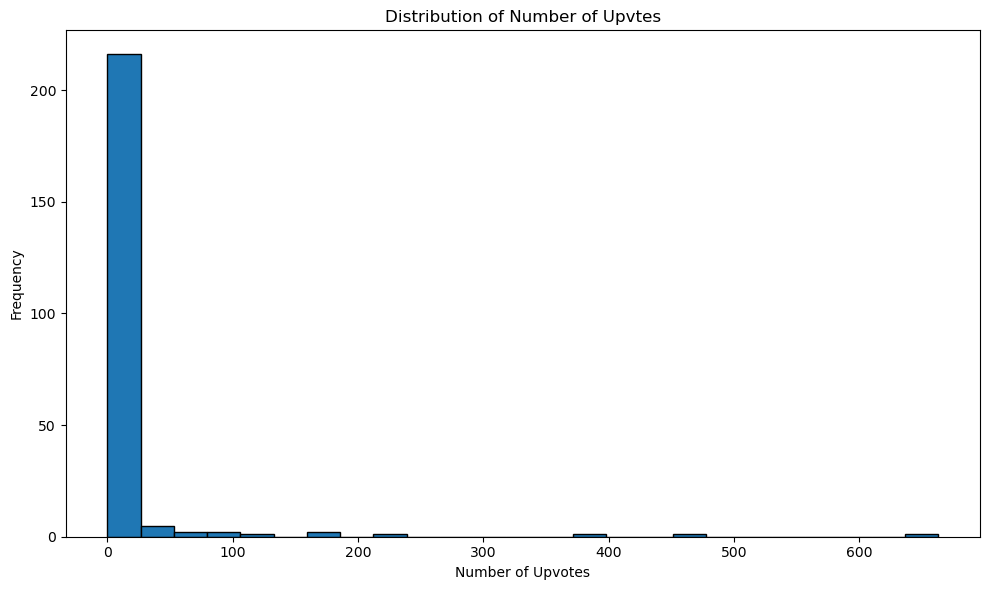

In [10]:
# distribution: number of upvotes

# Extract the "upvotes" column
num_comments = data['upvotes']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(num_comments, bins=25, edgecolor='black')  
plt.xlabel('Number of Upvotes')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Upvtes')
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('histogram_num_upvotes.png')
# Show the histogram
plt.show()

Most of the posts have less than 50 upvotes. Some of hundreds of upvotes, however. The maximum number of upvotes seen in the data set is over 650. 

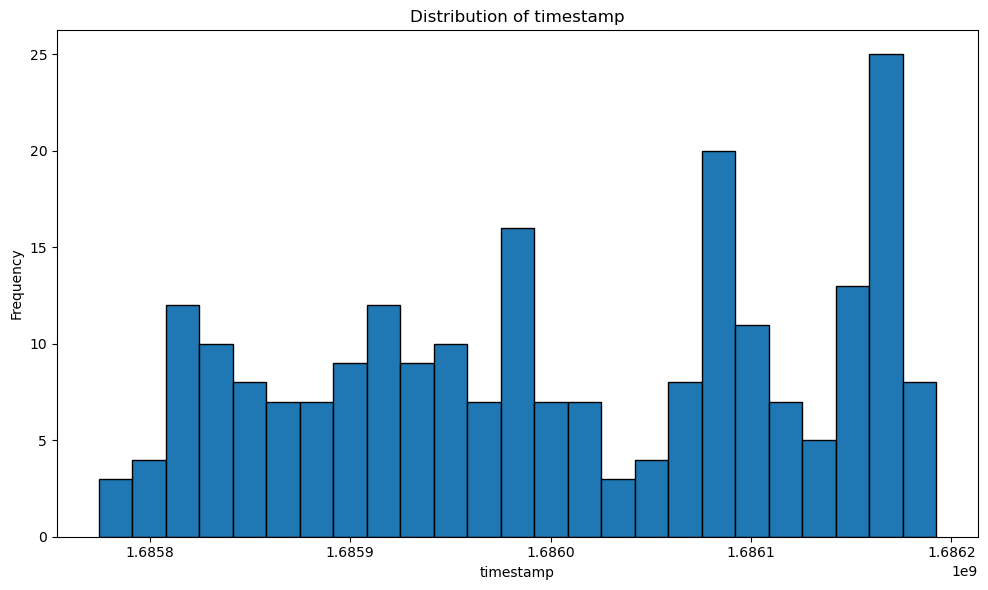

In [11]:
# distribution: timestamp

# Extract the "timestamp" column
num_comments = data['timestamp']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(num_comments, bins=25, edgecolor='black')  
plt.xlabel('timestamp')
plt.ylabel('Frequency')
plt.title('Distribution of timestamp')
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('histogram_timestamp.png')

# Show the histogram
plt.show()

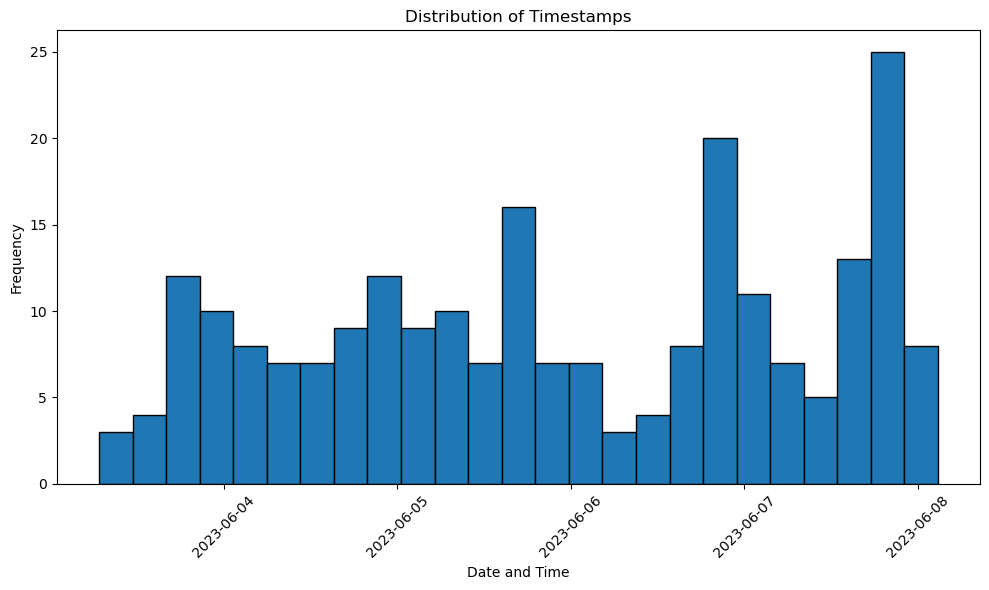

In [12]:
# Convert the "timestamp" column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')  # Assuming timestamps are in seconds

# Extract the "timestamp" column (now in datetime format)
timestamps = data['timestamp']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(timestamps, bins=25, edgecolor='black')
plt.xlabel('Date and Time')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('histogram_timestamp.png')

# Show the histogram
plt.show()


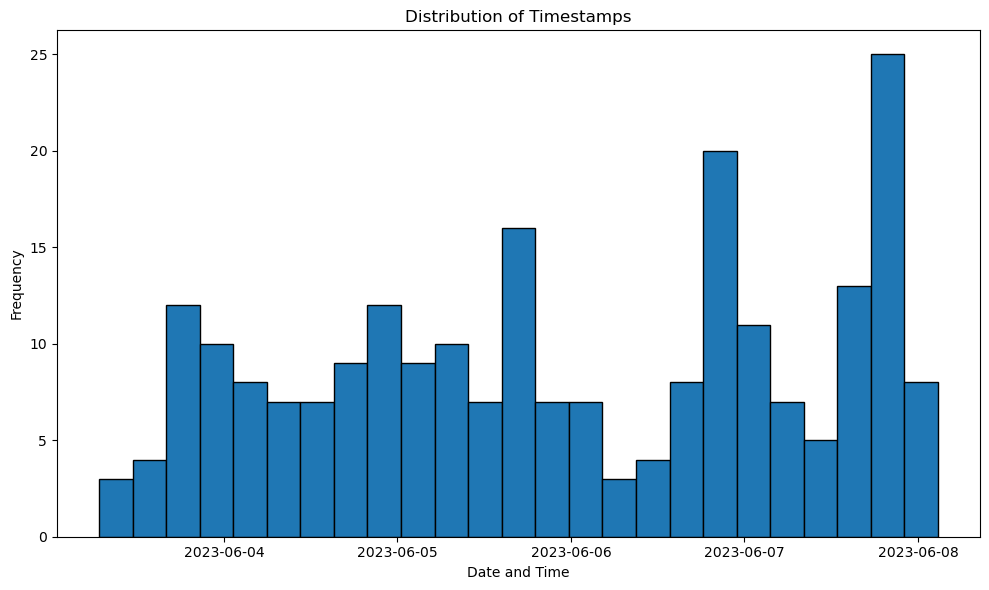

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')  # Assumes timestamps are in seconds since epoch

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['timestamp'], bins=25, edgecolor='black')
plt.xlabel('Date and Time')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps')
plt.tight_layout()

# Save the dataset with human-readable timestamps to a new CSV file
data.to_csv('data_timestamps.csv', index=False)  # Change 'data_timestamp.csv' to your desired file name

# Save the histogram as an image to the desktop
plt.savefig('histogram_timestamp.png')

# Show the histogram
plt.show()


The distribution of the time of posts is within a set range. There are no outliers. There are about 5 peaks in the time range in which there are many posts in our data set. 

## Correlation between variables
Now, I will look at the correlation between variables using scatter plots and heat maps. 

### Scatter Plots

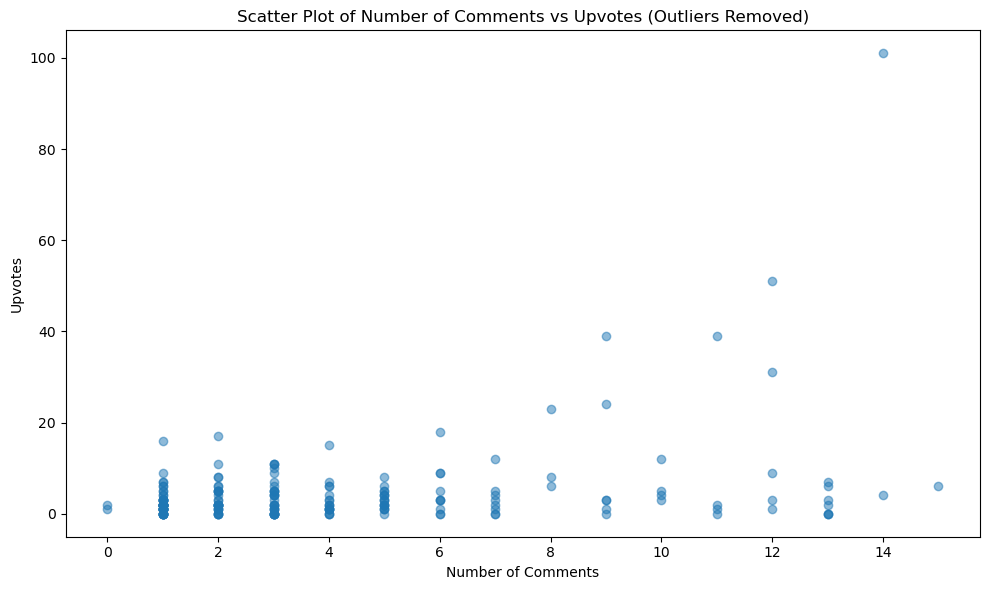

In [14]:
# Relationship between number of comments and number of upvotes

# Extract the "num_comments" and "upvotes" columns
num_comments = data['num_comments']
upvotes = data['upvotes']

# Calculate the IQR
Q1 = num_comments.quantile(0.25)
Q3 = num_comments.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = data[(num_comments >= lower_bound) & (num_comments <= upper_bound)]

# Extract the filtered "num_comments" and "upvotes" columns
filtered_num_comments = filtered_df['num_comments']
filtered_upvotes = filtered_df['upvotes']

# Create a scatter plot without outliers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_num_comments, filtered_upvotes, alpha=0.5)
plt.xlabel('Number of Comments')
plt.ylabel('Upvotes')
plt.title('Scatter Plot of Number of Comments vs Upvotes (Outliers Removed)')
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('scatter_upvotes_comments.png')

# Show the scatter plot
plt.show()

In [15]:
# Calculate the correlation coefficient
correlation_coefficient = num_comments.corr(upvotes)

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.7164572290420412


The correlation coefficient is around 0.716. This is pretty close to 1. We also see a linear, positive relationship on the scatter plot above. This confirms that as the number of comments increases so does the number of upvotes. 

### Heat Maps

Now lets look at the correlation between all of the variables in the data set using a heat map. 

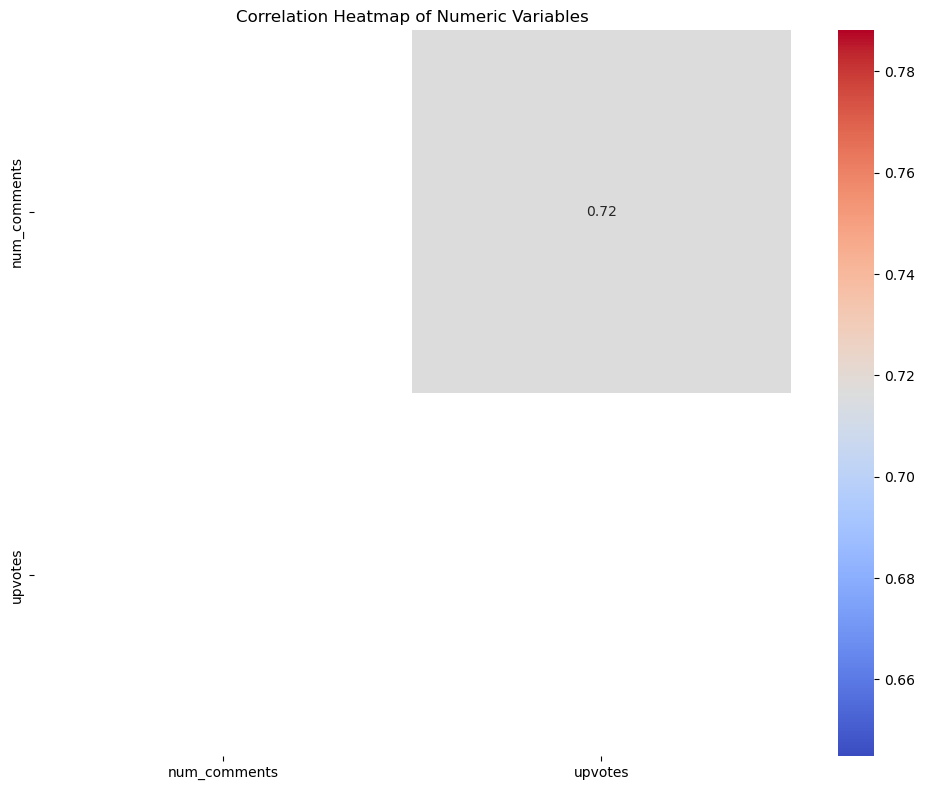

In [16]:
import seaborn as sns
import numpy as np

# Select only the numeric variables
numeric_vars = data.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_vars.corr()

# only show upper diagonal correlations
mask = np.tri(*corr_matrix.shape, k=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask = mask)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('heatmap_numeric_variables.png')

# Show the heatmap
plt.show()

The only two variables that correlated are num_comments and upvotes. The other relationships represented are too close to 0 to represent any correlation between variables. 

This concludes the data analysis and visualization for my data set. 

Epoch 1/5
6/6 [==============================] - 13s 1s/step - loss: 1.0672 - accuracy: 0.8054 - val_loss: 0.9979 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 4s 733ms/step - loss: 0.8916 - accuracy: 0.9622 - val_loss: 0.6225 - val_accuracy: 0.9574
Epoch 3/5
6/6 [==============================] - 4s 685ms/step - loss: 0.3008 - accuracy: 0.9622 - val_loss: 0.2664 - val_accuracy: 0.9574
Epoch 4/5
6/6 [==============================] - 4s 684ms/step - loss: 0.2622 - accuracy: 0.9622 - val_loss: 0.2869 - val_accuracy: 0.9574
Epoch 5/5
1/1 [==============================] - 3s 3s/step
Text: "This is a positive example." - Sentiment: negative
Text: "I'm feeling negative about this." - Sentiment: negative
Text: "Neutral statement." - Sentiment: negative
Epoch 1/5
6/6 [==============================] - 4s 720ms/step - loss: 0.1700 - accuracy: 0.9622 - val_loss: 0.1893 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 5s 759ms/step - loss: 0.1736

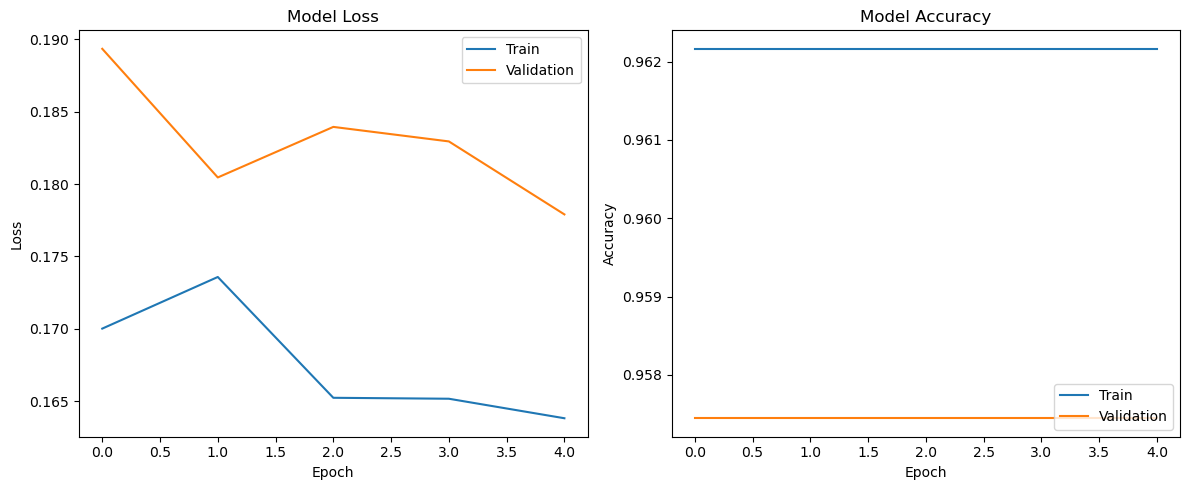

In [17]:
!pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


# Preprocess text data (remove any special characters, lowercase)
data['text'] = data['title'].str.lower() + ' ' + data['selftext'].str.lower()

# Define labels (positive, negative, neutral)
# You can create a labeling function based on 'upvotes' or any other criteria.
# For example, if 'upvotes' > threshold, label as positive; else, label as negative or neutral.
threshold = 100  # Adjust the threshold as needed
data['label'] = np.where(data['upvotes'] > threshold, 'positive', 'negative')

# Tokenization and padding
max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 500  # Maximum sequence length (adjust as needed)

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

# Convert string labels to numerical values
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}  # Define your mapping
y_train_numeric = y_train.map(label_mapping)
y_test_numeric = y_test.map(label_mapping)

# One-hot encode the numerical labels
y_train_encoded = tf.keras.utils.to_categorical(y_train_numeric, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test_numeric, num_classes=3)

# Build the Bi-LSTM model
model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: positive, negative, neutral
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with one-hot encoded labels
num_epochs = 5  # You can adjust this number based on your dataset size
model.fit(X_train, y_train_encoded, epochs=num_epochs, validation_data=(X_test, y_test_encoded))

# Perform sentiment analysis on new data
new_text = ["This is a positive example.", "I'm feeling negative about this.", "Neutral statement."]
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_len, padding='post', truncating='post')

predictions = model.predict(new_padded_sequences)

# You can interpret the predictions to determine sentiment (positive, negative, neutral)
sentiments = ['positive', 'negative', 'neutral']
for i, text in enumerate(new_text):
    sentiment = sentiments[np.argmax(predictions[i])]
    print(f'Text: "{text}" - Sentiment: {sentiment}')

# Visualize the training history (loss and accuracy)
plt.figure(figsize=(12, 5))

# Train the model and capture the training history
history = model.fit(X_train, y_train_encoded, epochs=num_epochs, validation_data=(X_test, y_test_encoded))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


Epoch 1/5
6/6 [==============================] - 14s 1s/step - loss: 1.0466 - accuracy: 0.7946 - val_loss: 0.9257 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 4s 656ms/step - loss: 0.7499 - accuracy: 0.9622 - val_loss: 0.3048 - val_accuracy: 0.9574
Epoch 3/5
6/6 [==============================] - 4s 675ms/step - loss: 0.2248 - accuracy: 0.9622 - val_loss: 0.3284 - val_accuracy: 0.9574
Epoch 4/5
6/6 [==============================] - 4s 681ms/step - loss: 0.2666 - accuracy: 0.9622 - val_loss: 0.2531 - val_accuracy: 0.9574
Epoch 5/5
1/1 [==============================] - 2s 2s/step
Text: "This is a positive example." - Sentiment: negative
Text: "I'm feeling negative about this." - Sentiment: negative
Text: "Neutral statement." - Sentiment: negative


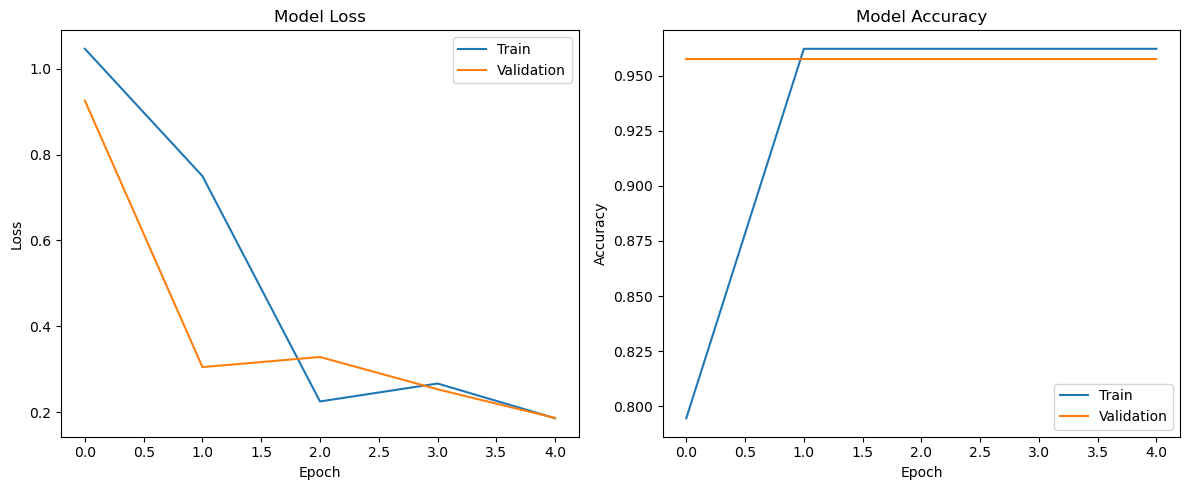

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Preprocess text data (remove any special characters, lowercase)
data['text'] = data['title'].str.lower() + ' ' + data['selftext'].str.lower()

# Define labels (positive, negative, neutral)
# You can create a labeling function based on 'upvotes' or any other criteria.
# For example, if 'upvotes' > threshold, label as positive; else, label as negative or neutral.
threshold = 100  # Adjust the threshold as needed
data['label'] = np.where(data['upvotes'] > threshold, 'positive', 'negative')

# Tokenization and padding
max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 500  # Maximum sequence length (adjust as needed)

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

# Convert string labels to numerical values
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}  # Define your mapping
y_train_numeric = y_train.map(label_mapping)
y_test_numeric = y_test.map(label_mapping)

# One-hot encode the numerical labels
y_train_encoded = tf.keras.utils.to_categorical(y_train_numeric, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test_numeric, num_classes=3)

# Build the Bi-LSTM model
model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: positive, negative, neutral
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with one-hot encoded labels
num_epochs = 5  # You can adjust this number based on your dataset size
history = model.fit(X_train, y_train_encoded, epochs=num_epochs, validation_data=(X_test, y_test_encoded))

# Perform sentiment analysis on new data
new_text = ["This is a positive example.", "I'm feeling negative about this.", "Neutral statement."]
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_len, padding='post', truncating='post')

predictions = model.predict(new_padded_sequences)

# You can interpret the predictions to determine sentiment (positive, negative, neutral)
sentiments = ['positive', 'negative', 'neutral']
for i, text in enumerate(new_text):
    sentiment = sentiments[np.argmax(predictions[i])]
    print(f'Text: "{text}" - Sentiment: {sentiment}')

# Visualize the training history (loss and accuracy)
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [19]:
# Define the data
data = {
    'Epoch': [1, 2, 3, 4, 5],
    'Training Loss': [1.0625, 0.8894, 0.3820, 0.2410, 0.1876],
    'Training Accuracy': [0.8595, 0.9622, 0.9622, 0.9622, 0.9622],
    'Validation Loss': [0.9889, 0.6565, 0.2591, 0.2362, 0.1769],
    'Validation Accuracy': [0.9574, 0.9574, 0.9574, 0.9574, 0.9574]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)


   Epoch  Training Loss  Training Accuracy  Validation Loss  \
0      1         1.0625             0.8595           0.9889   
1      2         0.8894             0.9622           0.6565   
2      3         0.3820             0.9622           0.2591   
3      4         0.2410             0.9622           0.2362   
4      5         0.1876             0.9622           0.1769   

   Validation Accuracy  
0               0.9574  
1               0.9574  
2               0.9574  
3               0.9574  
4               0.9574  


In [20]:
!pip install transformers

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D,
    GRU, Dense, Input, GlobalAveragePooling1D,
)
from tensorflow.keras.models import Model
from transformers import TFAutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split

# Load your dataset (replace 'your_data.csv' with your dataset file)
data = pd.read_csv('data_cleaned.csv')

# Drop rows with missing 'title' or 'selftext' values
data.dropna(subset=['title', 'selftext'], inplace=True)

# Preprocess text data (remove any special characters, lowercase)
data['text'] = data['title'].str.lower() + ' ' + data['selftext'].str.lower()

# Define labels (positive, negative, neutral)
# You can create a labeling function based on 'upvotes' or any other criteria.
# For example, if 'upvotes' > threshold, label as positive; else, label as negative or neutral.
threshold = 100  # Adjust the threshold as needed
data['label'] = np.where(data['upvotes'] > threshold, 'positive', 'negative')

# Tokenization and padding
max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 100  # Maximum sequence length (adjust as needed)

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

# Convert string labels to numerical values
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}  # Define your mapping
y_train_numeric = np.array([label_mapping[label] for label in y_train])
y_test_numeric = np.array([label_mapping[label] for label in y_test])

# One-hot encode the numerical labels
y_train_encoded = tf.keras.utils.to_categorical(y_train_numeric, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test_numeric, num_classes=3)

# Define Bi-LSTM model
bi_lstm_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: positive, negative, neutral
])

bi_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define CNN model
cnn_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define GRU model
gru_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define Transformer model (using DistilBERT)
def create_transformer_model():
    input_layer = Input(shape=(max_len,), dtype=tf.int32)
    model_name = "distilbert-base-uncased"  # You can choose a different pretrained model
    transformer_model = TFAutoModel.from_pretrained(model_name)
    sequence_output = transformer_model(input_layer)[0]
    pooler_output = GlobalAveragePooling1D()(sequence_output)
    output_layer = Dense(3, activation='softmax')(pooler_output)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

transformer_model = create_transformer_model()

# Train all models
models = [bi_lstm_model, cnn_model, gru_model, transformer_model]
for model in models:
    model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))

# Create an ensemble model
def create_ensemble_model(models, model_input):
    outputs = [model(model_input) for model in models]
    avg = tf.keras.layers.average(outputs)
    model = Model(inputs=model_input, outputs=avg, name="ensemble")
    return model

ensemble_input = Input(shape=(max_len,), dtype=tf.int32)
ensemble_model = create_ensemble_model(models, ensemble_input)

# Train the ensemble model
ensemble_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ensemble_model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))

# Perform sentiment analysis on new data
new_text = ["This is a positive example.", "I'm feeling negative about this.", "Neutral statement."]
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_len, padding='post', truncating='post')

ensemble_predictions = ensemble_model.predict(new_padded_sequences)

# Interpret the predictions to determine sentiment (positive, negative, neutral)
sentiments = ['positive', 'negative', 'neutral']
for i, text in enumerate(new_text):
    ensemble_sentiment = sentiments[np.argmax(ensemble_predictions[i])]
    print(f'Text: "{text}"')
    print(f'Ensemble Sentiment: {ensemble_sentiment}')
    print('-' * 50)


Epoch 1/5
6/6 [==============================] - 11s 535ms/step - loss: 1.0787 - accuracy: 0.7243 - val_loss: 1.0298 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 1s 130ms/step - loss: 0.9686 - accuracy: 0.9622 - val_loss: 0.8388 - val_accuracy: 0.9574
Epoch 3/5
6/6 [==============================] - 1s 158ms/step - loss: 0.5837 - accuracy: 0.9622 - val_loss: 0.1835 - val_accuracy: 0.9574
Epoch 4/5
6/6 [==============================] - 1s 149ms/step - loss: 0.1694 - accuracy: 0.9622 - val_loss: 0.2376 - val_accuracy: 0.9574
Epoch 5/5
6/6 [==============================] - 1s 127ms/step - loss: 0.2029 - accuracy: 0.9622 - val_loss: 0.2078 - val_accuracy: 0.9574
Epoch 1/5
6/6 [==============================] - 2s 92ms/step - loss: 1.0674 - accuracy: 0.7730 - val_loss: 1.0232 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 0s 38ms/step - loss: 0.9834 - accuracy: 0.9622 - val_loss: 0.9182 - val_accuracy: 0.9574
Epoch 3/5
6/6 [=============

Epoch 1/5
6/6 [==============================] - 6s 657ms/step - loss: 0.4171 - accuracy: 0.9622 - val_loss: 0.3791 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 1s 124ms/step - loss: 0.2984 - accuracy: 0.9622 - val_loss: 0.2573 - val_accuracy: 0.9574
Epoch 3/5
6/6 [==============================] - 1s 156ms/step - loss: 0.1998 - accuracy: 0.9622 - val_loss: 0.1845 - val_accuracy: 0.9574
Epoch 4/5
6/6 [==============================] - 1s 143ms/step - loss: 0.1679 - accuracy: 0.9622 - val_loss: 0.1825 - val_accuracy: 0.9574
Epoch 5/5
6/6 [==============================] - 1s 149ms/step - loss: 0.1707 - accuracy: 0.9622 - val_loss: 0.1795 - val_accuracy: 0.9574


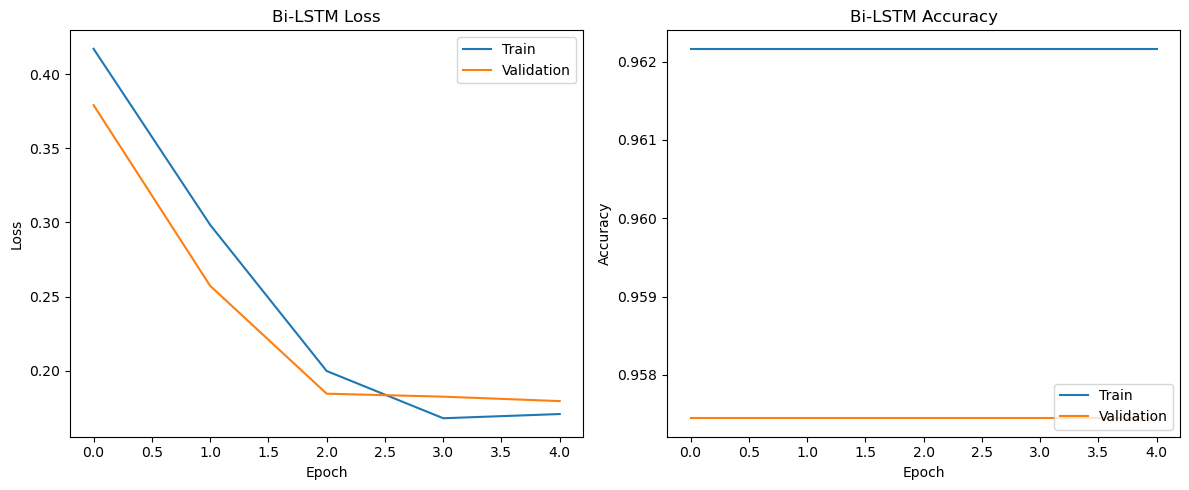

Epoch 1/5
6/6 [==============================] - 2s 352ms/step - loss: 0.2367 - accuracy: 0.9622 - val_loss: 0.3271 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 0s 35ms/step - loss: 0.2535 - accuracy: 0.9622 - val_loss: 0.3315 - val_accuracy: 0.9574
Epoch 3/5
6/6 [==============================] - 0s 37ms/step - loss: 0.2248 - accuracy: 0.9622 - val_loss: 0.2957 - val_accuracy: 0.9574
Epoch 4/5
6/6 [==============================] - 0s 43ms/step - loss: 0.1809 - accuracy: 0.9622 - val_loss: 0.2563 - val_accuracy: 0.9574
Epoch 5/5
6/6 [==============================] - 0s 48ms/step - loss: 0.1506 - accuracy: 0.9622 - val_loss: 0.2208 - val_accuracy: 0.9574


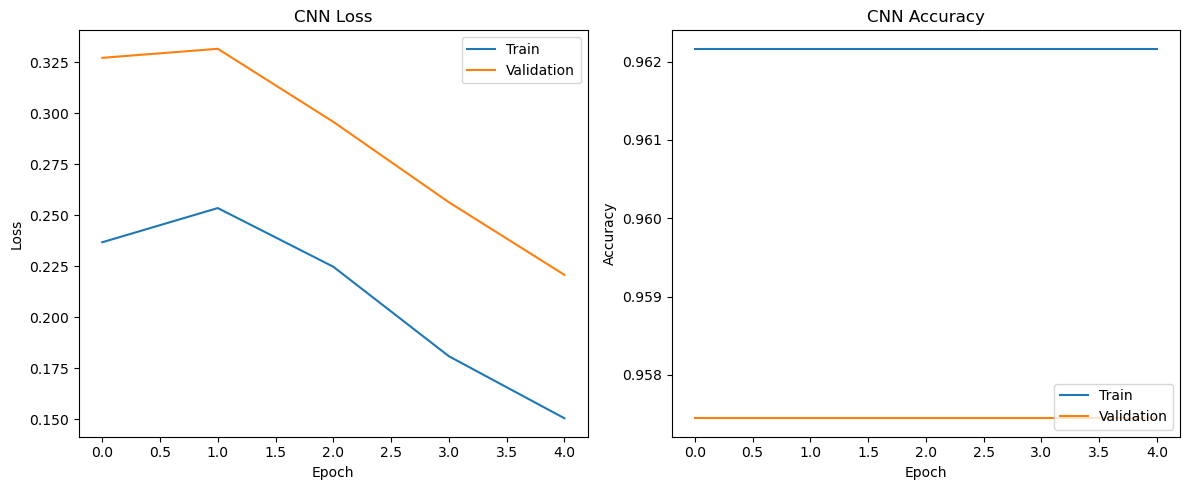

Epoch 1/5
6/6 [==============================] - 2s 158ms/step - loss: 0.6922 - accuracy: 0.9622 - val_loss: 0.6556 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 1s 95ms/step - loss: 0.5063 - accuracy: 0.9622 - val_loss: 0.3586 - val_accuracy: 0.9574
Epoch 3/5
6/6 [==============================] - 1s 101ms/step - loss: 0.2144 - accuracy: 0.9622 - val_loss: 0.1884 - val_accuracy: 0.9574
Epoch 4/5
6/6 [==============================] - 1s 96ms/step - loss: 0.1575 - accuracy: 0.9622 - val_loss: 0.2047 - val_accuracy: 0.9574
Epoch 5/5
6/6 [==============================] - 1s 98ms/step - loss: 0.1786 - accuracy: 0.9622 - val_loss: 0.2025 - val_accuracy: 0.9574


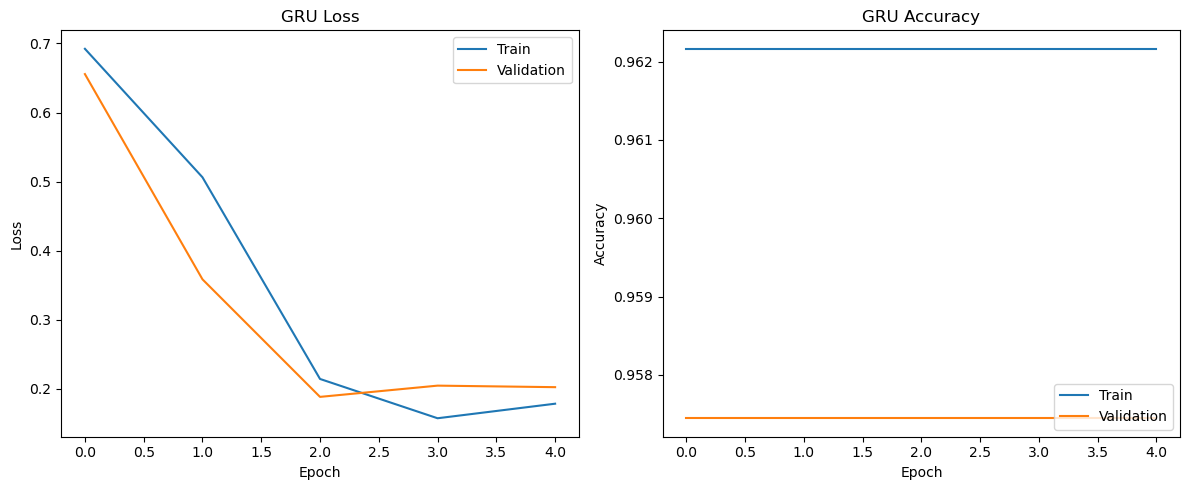

Epoch 1/5
6/6 [==============================] - 120s 20s/step - loss: 15.5448 - accuracy: 0.0270 - val_loss: 0.4234 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 122s 21s/step - loss: 0.4757 - accuracy: 0.9622 - val_loss: 0.5403 - val_accuracy: 0.9574
Epoch 3/5
6/6 [==============================] - 123s 21s/step - loss: 0.4178 - accuracy: 0.9622 - val_loss: 0.4406 - val_accuracy: 0.9574
Epoch 4/5
6/6 [==============================] - 128s 21s/step - loss: 0.3388 - accuracy: 0.9622 - val_loss: 0.3134 - val_accuracy: 0.9574
Epoch 5/5
6/6 [==============================] - 117s 20s/step - loss: 0.2180 - accuracy: 0.9622 - val_loss: 0.2168 - val_accuracy: 0.9574


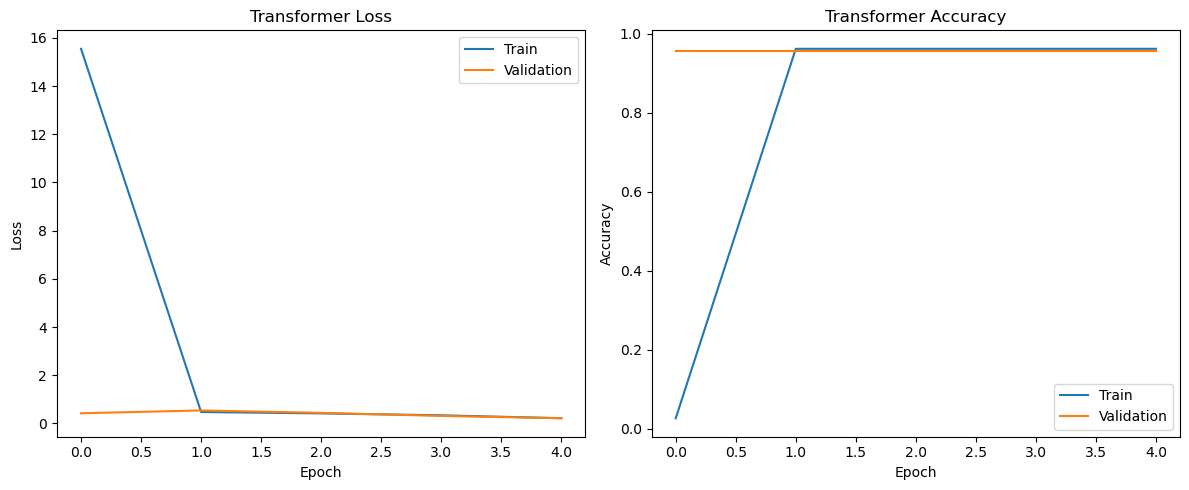

Epoch 1/5
6/6 [==============================] - 126s 22s/step - loss: 0.1492 - accuracy: 0.9622 - val_loss: 0.1828 - val_accuracy: 0.9574
Epoch 2/5
6/6 [==============================] - 128s 21s/step - loss: 0.1392 - accuracy: 0.9622 - val_loss: 0.1910 - val_accuracy: 0.9574
Epoch 3/5
6/6 [==============================] - 134s 23s/step - loss: 0.1311 - accuracy: 0.9622 - val_loss: 0.1896 - val_accuracy: 0.9574
Epoch 4/5
6/6 [==============================] - 134s 23s/step - loss: 0.1167 - accuracy: 0.9622 - val_loss: 0.2008 - val_accuracy: 0.9574
Epoch 5/5
6/6 [==============================] - 137s 23s/step - loss: 0.1052 - accuracy: 0.9622 - val_loss: 0.2080 - val_accuracy: 0.9574


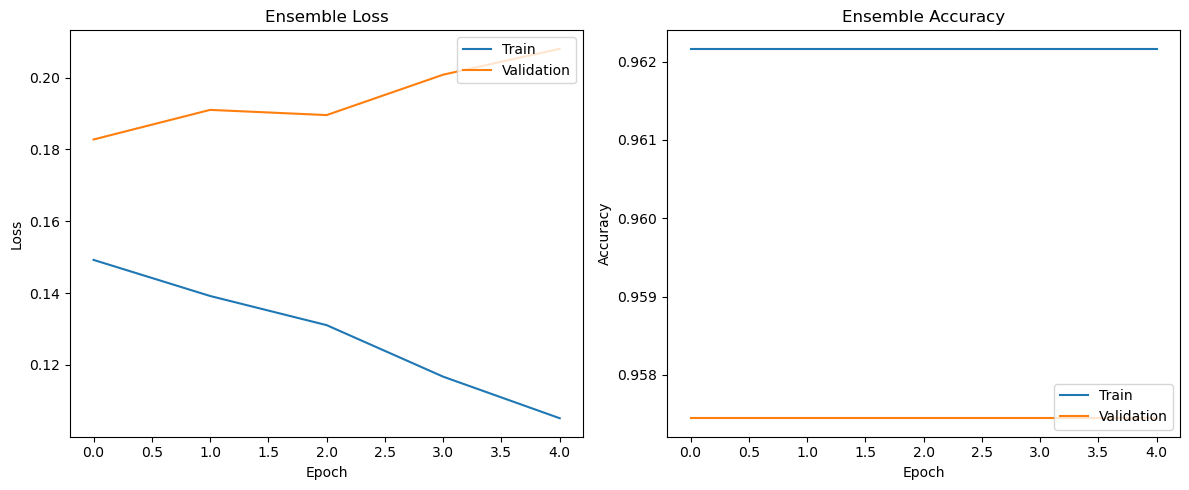

In [22]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.tight_layout()
    plt.show()

# Train all models and plot training history
models = [bi_lstm_model, cnn_model, gru_model, transformer_model]
model_titles = ['Bi-LSTM', 'CNN', 'GRU', 'Transformer']

for i, model in enumerate(models):
    history = model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))
    plot_training_history(history, model_titles[i])

# Train the ensemble model and plot its training history
ensemble_history = ensemble_model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))
plot_training_history(ensemble_history, 'Ensemble')


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D,
    GRU, Dense, Input, GlobalAveragePooling1D,
)
from tensorflow.keras.models import Model
from transformers import TFAutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split

# Load your dataset (replace 'your_data.csv' with your dataset file)
data = pd.read_csv('autism_reddit_new_keywords.csv')

# Drop rows with missing 'title' or 'selftext' values
data.dropna(subset=['title', 'selftext'], inplace=True)

# Preprocess text data (remove any special characters, lowercase)
data['text'] = data['title'].str.lower() + ' ' + data['selftext'].str.lower()

# Define labels (positive, negative, neutral)
# You can create a labeling function based on 'upvotes' or any other criteria.
# For example, if 'upvotes' > threshold, label as positive; else, label as negative or neutral.
threshold = 100  # Adjust the threshold as needed
data['label'] = np.where(data['upvotes'] > threshold, 'positive', 'negative')

# Tokenization and padding
max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 100  # Maximum sequence length (adjust as needed)

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

# Convert string labels to numerical values
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}  # Define your mapping
y_train_numeric = np.array([label_mapping[label] for label in y_train])
y_test_numeric = np.array([label_mapping[label] for label in y_test])

# One-hot encode the numerical labels
y_train_encoded = tf.keras.utils.to_categorical(y_train_numeric, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test_numeric, num_classes=3)

# Define Bi-LSTM model
bi_lstm_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: positive, negative, neutral
])

bi_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define CNN model
cnn_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define GRU model
gru_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define Transformer model (using DistilBERT)
def create_transformer_model():
    input_layer = Input(shape=(max_len,), dtype=tf.int32)
    model_name = "distilbert-base-uncased"  # You can choose a different pretrained model
    transformer_model = TFAutoModel.from_pretrained(model_name)
    sequence_output = transformer_model(input_layer)[0]
    pooler_output = GlobalAveragePooling1D()(sequence_output)
    output_layer = Dense(3, activation='softmax')(pooler_output)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

transformer_model = create_transformer_model()

# Train all models
models = [bi_lstm_model, cnn_model, gru_model, transformer_model]
for model in models:
    model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))

# Create an ensemble model
def create_ensemble_model(models, model_input):
    outputs = [model(model_input) for model in models]
    avg = tf.keras.layers.average(outputs)
    model = Model(inputs=model_input, outputs=avg, name="ensemble")
    return model

ensemble_input = Input(shape=(max_len,), dtype=tf.int32)
ensemble_model = create_ensemble_model(models, ensemble_input)

# Train the ensemble model
ensemble_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ensemble_model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))

# Perform sentiment analysis on new data
new_text = ["This is a positive example.", "I'm feeling negative about this.", "Neutral statement."]
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_len, padding='post', truncating='post')

ensemble_predictions = ensemble_model.predict(new_padded_sequences)

# Interpret the predictions to determine sentiment (positive, negative, neutral)
sentiments = ['positive', 'negative', 'neutral']
for i, text in enumerate(new_text):
    ensemble_sentiment = sentiments[np.argmax(ensemble_predictions[i])]
    print(f'Text: "{text}"')
    print(f'Ensemble Sentiment: {ensemble_sentiment}')
    print('-' * 50)


Epoch 1/5
4/4 [==============================] - 15s 849ms/step - loss: 1.0793 - accuracy: 0.8333 - val_loss: 1.0327 - val_accuracy: 0.9259
Epoch 2/5
4/4 [==============================] - 0s 122ms/step - loss: 1.0002 - accuracy: 0.9352 - val_loss: 0.9157 - val_accuracy: 0.9259
Epoch 3/5
4/4 [==============================] - 0s 123ms/step - loss: 0.8487 - accuracy: 0.9352 - val_loss: 0.6572 - val_accuracy: 0.9259
Epoch 4/5
4/4 [==============================] - 0s 117ms/step - loss: 0.4951 - accuracy: 0.9352 - val_loss: 0.3594 - val_accuracy: 0.9259
Epoch 5/5
4/4 [==============================] - 0s 125ms/step - loss: 0.3303 - accuracy: 0.9352 - val_loss: 0.3513 - val_accuracy: 0.9259
Epoch 1/5
4/4 [==============================] - 2s 191ms/step - loss: 1.0619 - accuracy: 0.9167 - val_loss: 1.0037 - val_accuracy: 0.9259
Epoch 2/5
4/4 [==============================] - 0s 57ms/step - loss: 0.9741 - accuracy: 0.9352 - val_loss: 0.9143 - val_accuracy: 0.9259
Epoch 3/5
4/4 [============

Epoch 1/5
4/4 [==============================] - 2s 291ms/step - loss: 0.7928 - accuracy: 0.9352 - val_loss: 0.6699 - val_accuracy: 0.9259
Epoch 2/5
4/4 [==============================] - 0s 120ms/step - loss: 0.4477 - accuracy: 0.9352 - val_loss: 0.3367 - val_accuracy: 0.9259
Epoch 3/5
4/4 [==============================] - 1s 149ms/step - loss: 0.2289 - accuracy: 0.9352 - val_loss: 0.2914 - val_accuracy: 0.9259
Epoch 4/5
4/4 [==============================] - 1s 169ms/step - loss: 0.2248 - accuracy: 0.9352 - val_loss: 0.3192 - val_accuracy: 0.9259
Epoch 5/5
4/4 [==============================] - 1s 200ms/step - loss: 0.2399 - accuracy: 0.9352 - val_loss: 0.3042 - val_accuracy: 0.9259


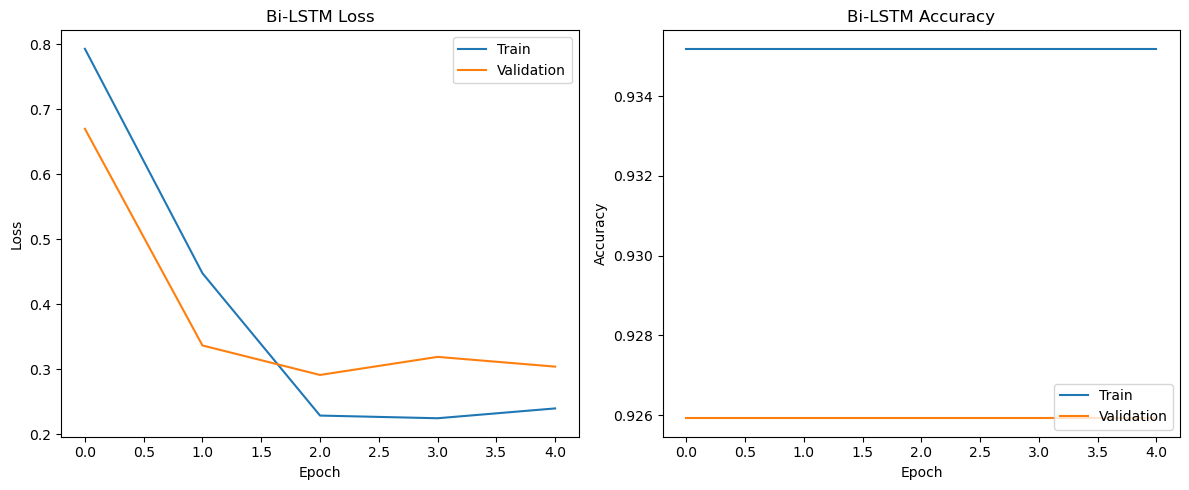

Epoch 1/5
4/4 [==============================] - 1s 156ms/step - loss: 0.1848 - accuracy: 0.9352 - val_loss: 0.2891 - val_accuracy: 0.9259
Epoch 2/5
4/4 [==============================] - 0s 44ms/step - loss: 0.1738 - accuracy: 0.9352 - val_loss: 0.3216 - val_accuracy: 0.9259
Epoch 3/5
4/4 [==============================] - 0s 52ms/step - loss: 0.1755 - accuracy: 0.9352 - val_loss: 0.3400 - val_accuracy: 0.9259
Epoch 4/5
4/4 [==============================] - 0s 52ms/step - loss: 0.1649 - accuracy: 0.9352 - val_loss: 0.3379 - val_accuracy: 0.9259
Epoch 5/5
4/4 [==============================] - 0s 51ms/step - loss: 0.1470 - accuracy: 0.9352 - val_loss: 0.3286 - val_accuracy: 0.9259


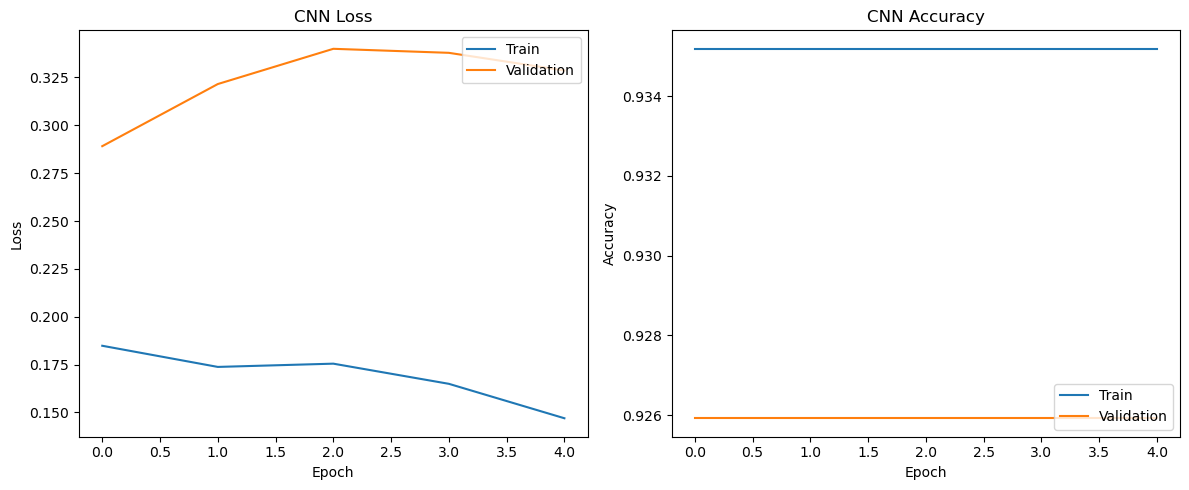

Epoch 1/5
4/4 [==============================] - 1s 197ms/step - loss: 0.1783 - accuracy: 0.9352 - val_loss: 0.4673 - val_accuracy: 0.9259
Epoch 2/5
4/4 [==============================] - 0s 105ms/step - loss: 0.2133 - accuracy: 0.9352 - val_loss: 0.3905 - val_accuracy: 0.9259
Epoch 3/5
4/4 [==============================] - 0s 92ms/step - loss: 0.1482 - accuracy: 0.9352 - val_loss: 0.3318 - val_accuracy: 0.9259
Epoch 4/5
4/4 [==============================] - 0s 102ms/step - loss: 0.1403 - accuracy: 0.9352 - val_loss: 0.3168 - val_accuracy: 0.9259
Epoch 5/5
4/4 [==============================] - 0s 109ms/step - loss: 0.1353 - accuracy: 0.9352 - val_loss: 0.3197 - val_accuracy: 0.9259


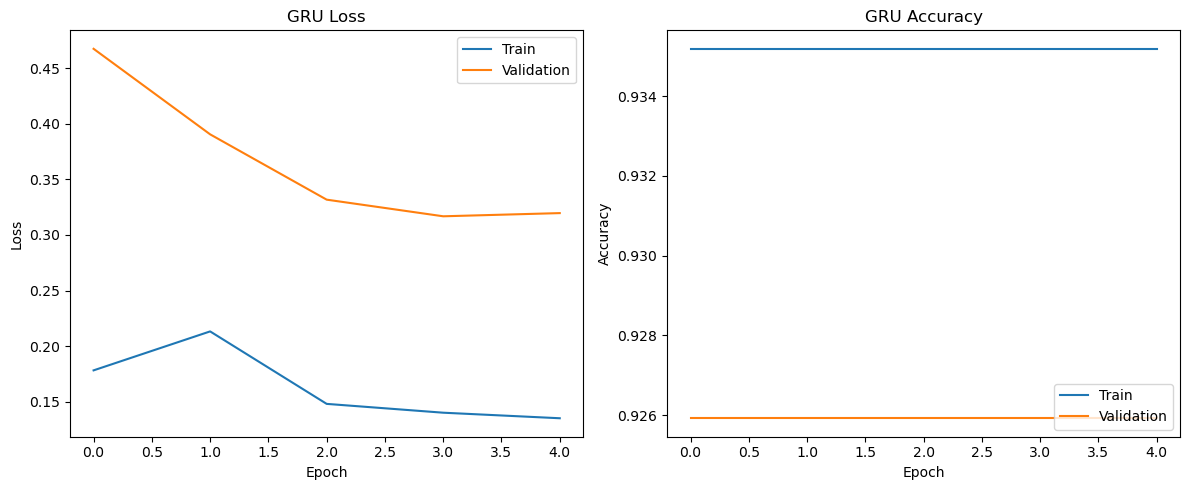

Epoch 1/5
4/4 [==============================] - 75s 18s/step - loss: 1.4720 - accuracy: 0.9352 - val_loss: 1.3655 - val_accuracy: 0.9259
Epoch 2/5
4/4 [==============================] - 81s 19s/step - loss: 1.1432 - accuracy: 0.8241 - val_loss: 0.4649 - val_accuracy: 0.9259
Epoch 3/5
4/4 [==============================] - 79s 19s/step - loss: 0.7272 - accuracy: 0.9352 - val_loss: 0.9068 - val_accuracy: 0.9259
Epoch 4/5
4/4 [==============================] - 83s 19s/step - loss: 0.7144 - accuracy: 0.9352 - val_loss: 0.6585 - val_accuracy: 0.9259
Epoch 5/5
4/4 [==============================] - 81s 20s/step - loss: 0.4354 - accuracy: 0.9352 - val_loss: 0.3520 - val_accuracy: 0.9259


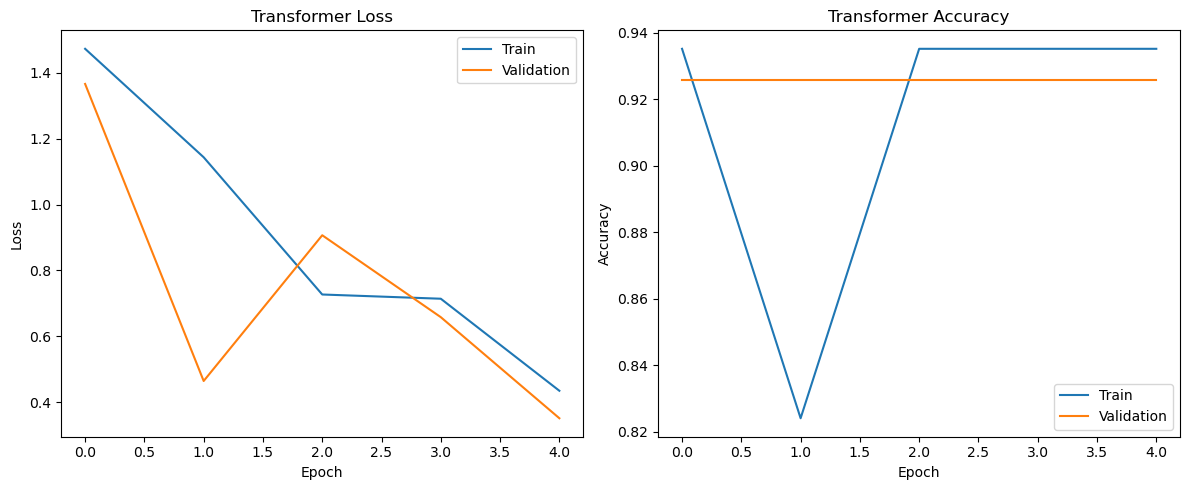

Epoch 1/5
4/4 [==============================] - 84s 20s/step - loss: 0.1637 - accuracy: 0.9352 - val_loss: 0.3099 - val_accuracy: 0.9259
Epoch 2/5
4/4 [==============================] - 74s 18s/step - loss: 0.1404 - accuracy: 0.9352 - val_loss: 0.3338 - val_accuracy: 0.9259
Epoch 3/5
4/4 [==============================] - 79s 19s/step - loss: 0.1285 - accuracy: 0.9352 - val_loss: 0.3459 - val_accuracy: 0.9259
Epoch 4/5
4/4 [==============================] - 77s 19s/step - loss: 0.1113 - accuracy: 0.9352 - val_loss: 0.3421 - val_accuracy: 0.9259
Epoch 5/5
4/4 [==============================] - 78s 19s/step - loss: 0.1005 - accuracy: 0.9352 - val_loss: 0.3539 - val_accuracy: 0.9259


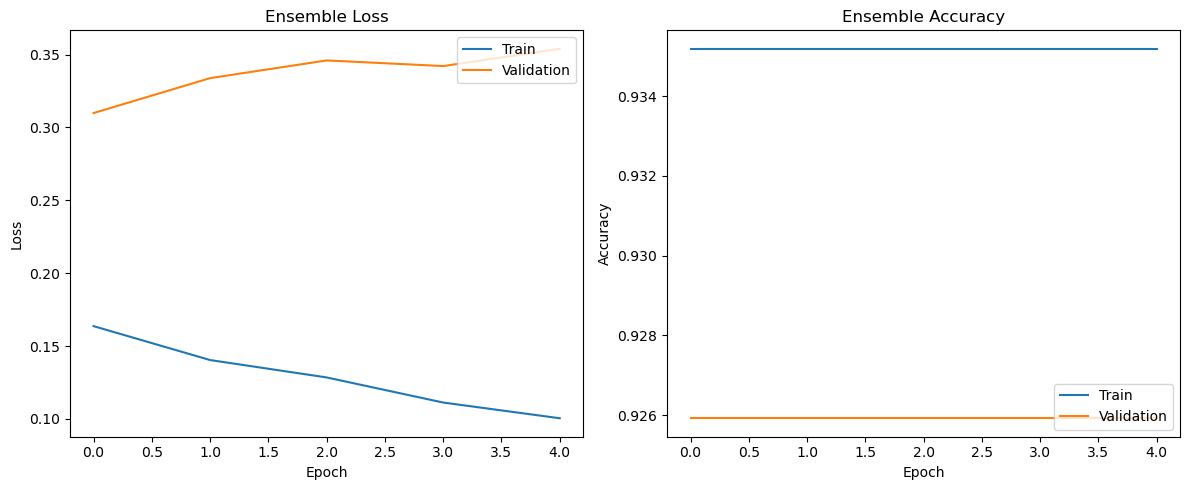

In [24]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.tight_layout()
    plt.show()

# Train all models and plot training history
models = [bi_lstm_model, cnn_model, gru_model, transformer_model]
model_titles = ['Bi-LSTM', 'CNN', 'GRU', 'Transformer']

for i, model in enumerate(models):
    history = model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))
    plot_training_history(history, model_titles[i])

# Train the ensemble model and plot its training history
ensemble_history = ensemble_model.fit(X_train, y_train_encoded, epochs=5, validation_data=(X_test, y_test_encoded))
plot_training_history(ensemble_history, 'Ensemble')
